# Implementação de marca d'água via SVD

**Autores:**

* João Ricardo de Almeida Lustosa - N°USP: 15463697

* Juan Henriques Passos - N°USP: 15464826

**Disciplina:** SME0142 - Álgebra Linear e Aplicações

---

## 1. Introdução:
Nesse trabalho apresentamos uma implementação prática de **Marca d'água digital (_Digital Watermarking_)** utilizando **Decomposição de Valores Singulares (SVD)**.

O objetivo é marcar um imagem principal (hospedeira) com uma imagem secundária (marca d'agua) oculta, de forma imperceptível. Esse método é muito utilizado para proteção de direitos autorais.

Para ser eficaz, um sistema de marca d'água deve atender a três requisitos fundamentais:
* **Invisibilidade:** A marca não deve causar distorção perceptível na imagem original.
* **Robustez:** A marca deve resistir a ataques intencionais ou processamentos comuns (como compressão e filtragem).
* **Capacidade:** Quantidade de dados que podem ser inseridos.

## 2. Fundamentação Teórica:

Imagine que uma imagem pode ser entendida como uma tabela de números, ou seja, uma matriz, em que cada número representa a intensidade dos pixel da imagem.

**Metodologia:** Para a marcação da imagem, em vez de alterar diretamente os pixels da imagem, utilizamos os valores singulares, extraidos via SVD, o que minimiza distorções na imagem marcada, trazendo um resultado mais satisfatório.

## 3. Estrutura do Notebook:
O código está dividido em duas etapas principais:
1.  **Teoria da Decomposição em Valores Singulares:** Explicar a técnica utilizada pela aplicação de marca d'água.
2.  **Embedding (Inserção):** Onde a marca é inserida matematicamente na imagem original.
3.  **Extraction (Extração):** Onde realizamos a engenharia reversa para recuperar a marca d'água (utilizando o método "não-cego", que requer a imagem original).

---

# 1. Teoria da Decomposição em Valores Singulares
## 1.1 Decomposição em Valores Singulares
A decomposição em valores singulares (SVD) é uma técnica de álgebra linear que
decompõe uma matriz dada em três matrizes componentes: 
1. Os vetores singulares à esquerda; 
2. Um conjunto de valores singulares;
3. Os vetores singulares à direita. 

As duas matrizes que são compostas por vetores singulares fornecem informações sobre a estrutura da
matriz original. Os valores singulares descrevem a intensidade dos componentes dados da
matriz original. O teorema da SVD afirma que, dada uma matriz M, então
existe uma decomposição de M tal que A = USV.

$$
\underbrace{
\begin{bmatrix}
a_{11} & a_{12} & \cdots & a_{1n} \\
a_{21} & a_{22} & \cdots & a_{2n} \\
\vdots & \vdots & \ddots & \vdots \\
a_{m1} & a_{m2} & \cdots & a_{mn}
\end{bmatrix}
}_{A \ (m \times n)}
=
\underbrace{
\begin{bmatrix}
u_{11} & u_{12} & \cdots & u_{1m} \\
u_{21} & u_{22} & \cdots & u_{2m} \\
\vdots & \vdots & \ddots & \vdots \\
u_{m1} & u_{m2} & \cdots & u_{mm}
\end{bmatrix}
}_{U \ (m \times m)}
\times
\underbrace{
\begin{bmatrix}
s_{1} & 0 & \cdots & 0 \\
0 & s_{2} & \cdots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \cdots & 0
\end{bmatrix}
}_{S \ (m \times n)}
\times
\underbrace{
\begin{bmatrix}
v_{11} & v_{12} & \cdots & v_{1n} \\
v_{21} & v_{22} & \cdots & v_{2n} \\
\vdots & \vdots & \ddots & \vdots \\
v_{n1} & v_{n2} & \cdots & v_{nn}
\end{bmatrix}
}_{V^T \ (n \times n)}
$$

**Onde:**
* $A$: Matriz de dados (imagem).
* $U$: Matriz ortogonal esquerda (estrutura das linhas).
* $S$: Matriz diagonal contendo os valores singulares $s_i$ (intensidade), onde $s_1 \geq s_2 \geq \dots \geq 0$. Os elementos fora da diagonal principal são **zero**.
* $V^T$: Matriz ortogonal direita transposta (estrutura das colunas).

## 1.2 Marca d'água por decomposição de valores singulares

### Resumo Teórico: SVD e o Teorema da Perturbação

A estratégia principal consiste em inserir a marca d'água modificando a matriz diagonal $S$ (Valores Singulares), e não os pixels diretamente.

#### O Teorema da Perturbação de Valor Singular

O ponto crítico da validade deste método é o **Teorema da Perturbação**. Ele fornece a garantia matemática de que a inserção da marca d'água não destruirá a qualidade visual da imagem original.

A relação entre os valores singulares da imagem marcada ($A_W$) e da original ($A$) é limitada matematicamente pela desigualdade:

$$|s_{i}(A_{W}) - s_{i}(A)| \le a||W||_{2}$$

Onde:
* $s_{i}$: O $i$-ésimo valor singular.
* $a$: O fator de escala (intensidade da marca).
* $||W||_{2}$: A norma espectral (magnitude) da matriz da marca d'água.

**Implicações Práticas do Teorema:**

1. **Limite Superior de Erro (Imperceptibilidade):** A equação prova que a distorção introduzida na imagem tem um "teto". A diferença visual nunca excederá a energia da marca d'água multiplicada pelo fator de escala. Isso permite ajustar $a$ para garantir que a alteração seja invisível ao olho humano.
2. **Estabilidade (Robustez):** O teorema implica que pequenas perturbações na imagem (como ruído ou compressão) causam apenas pequenas variações nos valores singulares. Logo, a marca d'água inserida em $S$ tende a sobreviver a ataques que alteram levemente os pixels.

#### Outras Vantagens
Além da garantia de perturbação limitada, o método se beneficia das **propriedades algébricas intrínsecas** do SVD, oferecendo alta resistência a ataques geométricos (como rotação e transposição), onde métodos tradicionais no domínio espacial costumam falhar.

1 - Imagem Hospedeira Original


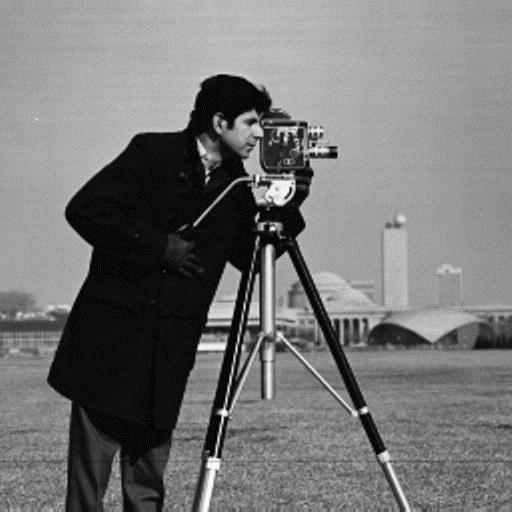


2 - Marca d'água Original


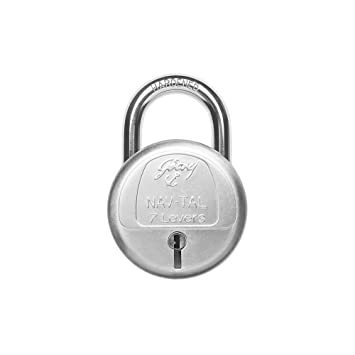

In [11]:
import cv2
from google.colab.patches import cv2_imshow

# 1. Carregar imagens em tons de cinza (0)
host = cv2.imread('photographer.jpg', 0)
watermark = cv2.imread('lock.jpg', 0)

print('1 - Imagem Hospedeira Original')
cv2_imshow(host)
print()
print('2 - Marca d\'água Original')
cv2_imshow(watermark)


# 2. Processo de Inserção (Embedding)
O processo de inserção da marca d'água $W$ na imagem original $F$ segue quatro passos principais:

1.  **Decomposição da Imagem Original:**
    A SVD é executada na imagem original (matriz $F$) para obter as matrizes $U$, $S$ e $V^T$.
    $$F = U S V^T$$

2.  **Adição da Marca D'água:**
    A marca d'água ($W$) é somada aos valores singulares da imagem original ($S$), multiplicada por um fator de escala $\alpha$ que controla a intensidade da inserção. Isso gera uma nova matriz modificada $D$:
    $$D = S + \alpha W$$

3.  **Decomposição da Matriz Modificada:**
    A SVD é realizada na nova matriz modificada $D$ para obter os componentes $U_w$, $S_w$ e $V_w^T$.
    $$D = U_w S_w V_w^T$$

4.  **Reconstrução da Imagem Marcada:**
    A imagem marcada final ($F_w$) é obtida utilizando a matriz de valores singulares modificada ($S_w$) combinada com as matrizes originais $U$ e $V^T$.
    $$F_w = U S_w V^T$$


![Fluxograma](Fluxograma.png)
**Figura 2:** Procedimento de incorporação da marca d'água.

- Imagem Original $\to$ Segmentação: Recepção da imagem(matrix) para ser dividida.
- Segmentação $\to$ Blocos: A imagem foi dividida em blocos que aumento da robustez contra ataques, além de sobrevivência contra distorções e cortes.
- Blocos $\to$ Cálculo da SVD: Aplicação do SVD em cada bloco.
- Cálculo da SVD $\to$ USV: Gera as decomposições USV.
- USV $\to$ Inserção da Marca: Processo de inserção da marca d'água.
- Inserção da Marca $\to$ SVD Inversa: Inserido a marca, temos que reconstruir a imagem orignal com a marca.
- SVD Inversa $\to$ Imagem Marcada: Junção dos blocos com a marca inserida.
---

Iniciando embedding SVD em blocos de 32x32...
dimensao imagem hospedeira 512x512
Embedding em blocos concluído.
3 - Imagem com Marca d'água


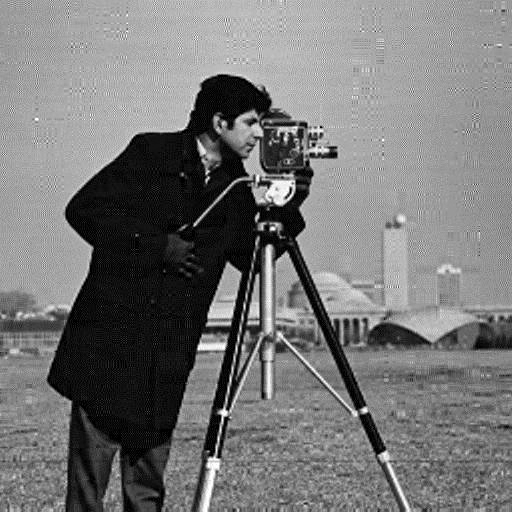

In [24]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

def embed_svd(host_image, watermark_image, alpha, block_size=32):
    """
    Embute uma marca d'água (watermark_image) em uma imagem hospedeira (host_image)
    usando SVD em blocos.

    :param host_image: A imagem original (tons de cinza).
    :param watermark_image: A imagem da marca d'água (tons de cinza).
    :param alpha: O fator de força (quão forte a marca d'água é embutida).
    :param block_size: O tamanho de cada bloco (ex: 8 para 8x8).
    :return: A imagem marcada (watermarked_image).
    """
    print(f"Iniciando embedding SVD em blocos de {block_size}x{block_size}...")

    # Guarda as chaves para a extração
    keys = {}

    # Converter imagens para float para cálculos
    host_image_f = host_image.astype(float)

    # Redimensionar a marca d'água para o tamanho da hospedeira
    # Isso simplifica o mapeamento 1:1 dos blocos.
    watermark_image_f = cv2.resize(watermark_image, (block_size, block_size)).astype(float)

    # Preparar a imagem de saída
    watermarked_image = np.zeros_like(host_image_f)

    rows, cols = host_image.shape
    print(f"dimensao imagem hospedeira {rows}x{cols}")

    # Iterar sobre a imagem em blocos
    for r in range(0, rows, block_size):
        for c in range(0, cols, block_size):

            # Definir os limites do bloco atual
            # (Lida com imagens que não são perfeitamente divisíveis pelo block_size)
            r_end = min(r + block_size, rows)
            c_end = min(c + block_size, cols)

            # Obter os blocos da hospedeira e da marca d'água
            host_block = host_image_f[r:r_end, c:c_end]

            # Salvar o formato real do bloco (pode ser menor nas bordas)
            current_block_shape = host_block.shape

            # Tratamento de bordas: se o bloco for menor que o padrão (cantos da imagem),
            # redimensionamos a marca d'água pequena para caber ali.
            if current_block_shape[0] != block_size or current_block_shape[1] != block_size:
                watermark_block = cv2.resize(watermark_image_f, (current_block_shape[1], current_block_shape[0]))
            else:
                watermark_block = watermark_image_f

            # Aplicar SVD no bloco da imagem hospedeira
            try:
                U_h, S_h_diag, V_h_T = np.linalg.svd(host_block)
            except np.linalg.LinAlgError:
                # Se SVD falhar (ex: bloco com todos os pixels iguais),
                # apenas copie o bloco original.
                watermarked_image[r:r_end, c:c_end] = host_block
                continue

            # Reconstruir S_h como uma matriz diagonal
            S_h = np.zeros(current_block_shape, dtype=float)
            k = min(current_block_shape)
            S_h[:k, :k] = np.diag(S_h_diag)

            # Adicionar a marca d'água (fórmula D = S + a*W)
            # Note que S_h e watermark_block devem ter o mesmo tamanho.
            D = S_h + alpha * watermark_block

            # Aplica-se um novo SVD à matriz D
            U_w, S_w_block, V_w_T = np.linalg.svd(D)

            # Guarda as chaves
            keys[(r, c)] = (U_w, V_w_T)

            # Reconstruir S_w_block como matriz diagonal
            S_w_mat = np.zeros(current_block_shape, dtype=float)
            S_w_mat[:k, :k] = np.diag(S_w_block)

            # Reconstruir o bloco marcado
            # Imagem_marcada = U_h * S_w * V_h_T
            watermarked_block = U_h @ S_w_mat @ V_h_T

            # Colocar o bloco processado na imagem de saída
            watermarked_image[r:r_end, c:c_end] = watermarked_block

    # Clampar/Truncar valores e converter de volta para uint8
    watermarked_image = np.clip(watermarked_image, 0, 255)
    watermarked_image = np.uint8(watermarked_image)

    print("Embedding em blocos concluído.")
    return watermarked_image, keys

# Exemplo de uso

# Fator de força da marca d'água.
# Valores maiores = mais robusto, mas mais visível.
# Valores menores = menos visível, mas menos robusto.
ALPHA = 0.05


# 2. Embutir a marca d'água
watermarked_image, keys = embed_svd(host, watermark, ALPHA)

# Exibir imagem com a marca d'água
print('3 - Imagem com Marca d\'água')
cv2_imshow(watermarked_image)

## 2. Processo de Extração (Detection)

Para extrair a marca d'água (que pode estar corrompida devido a ataques) de uma imagem marcada $F_w^*$, é necessário possuir as matrizes $U_w$, $S$, $V_w$ e o fator $\alpha$. Os passos são revertidos da seguinte forma:

1.  **Decomposição da Imagem Recebida:**
    A SVD é executada na imagem marcada, possivelmente distorcida ($F_w^*$).
    $$F_w^* = U^* S_w^* V^{*T}$$

2.  **Estimativa da Matriz D:**
    Calcula-se a matriz $D^*$ que contém a marca d'água, utilizando os valores singulares extraídos ($S_w^*$) e as matrizes ortogonais da inserção ($U_w$ e $V_w$).
    $$D^* = U_w S_w^* V_w^T$$

3.  **Recuperação da Marca D'água:**
    A marca d'água possivelmente corrompida ($W^*$) é isolada subtraindo-se a matriz $S$ original e dividindo pelo fator $\alpha$.
    $$W^* = \frac{D^* - S}{\alpha}$$

Iniciando extração SVD em blocos de 32x32...
Extração em blocos concluída.
4 - Marca d'água Extraída


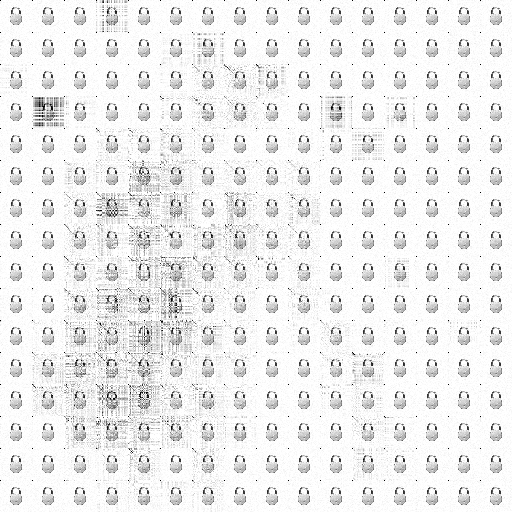

5 - Visualização da Marca d'água


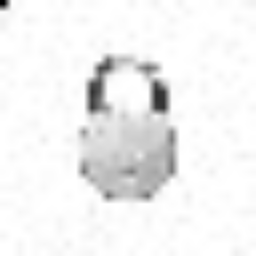

In [26]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

def extract_svd(watermarked_image, host_image, alpha, keys, block_size=32):
    """
    Extrai uma marca d'água (watermark_image) de uma imagem marcada (watermarked_image)
    usando SVD em blocos.

    NOTA: Este é um método "não-cego" (non-blind) e REQUER a imagem hospedeira
    original para a extração, conforme descrito na fórmula do artigo. [cite: 222]

    :param watermarked_image: A imagem marcada.
    :param host_image: A imagem hospedeira ORIGINAL.
    :param alpha: O fator de força usado no embedding.
    :param block_size: O tamanho de bloco usado no embedding.
    :return: A imagem da marca d'água extraída.
    """
    print(f"Iniciando extração SVD em blocos de {block_size}x{block_size}...")

    # Converter imagens para float
    watermarked_image_f = watermarked_image.astype(float)
    host_image_f = host_image.astype(float)

    # Preparar a imagem de saída para a marca d'água
    extracted_watermark = np.zeros_like(host_image_f)

    rows, cols = host_image_f.shape

    # Iterar sobre a imagem em blocos (deve ser idêntico ao embedding)
    for r in range(0, rows, block_size):
        for c in range(0, cols, block_size):

            # Definir os limites do bloco atual
            r_end = min(r + block_size, rows)
            c_end = min(c + block_size, cols)

            # Obter os blocos da imagem marcada e da hospedeira
            watermarked_block = watermarked_image_f[r:r_end, c:c_end]
            host_block = host_image_f[r:r_end, c:c_end]

            current_block_shape = host_block.shape

            if (r, c) not in keys:
              continue

            # Recupera U e V para a reconstrução da marca d'água
            U_w, V_w_T = keys[(r, c)]

            # Calcular SVD de AMBOS os blocos para obter suas matrizes S

            try:
                # Obter S da hospedeira (S) da marcada(S_w_extracted)
                U_h, S_h_diag, V_h_T = np.linalg.svd(host_block)

                S_w_extracted = U_h.T @ watermarked_block @ V_h_T.T

            except np.linalg.LinAlgError:
                # SVD falhou, pular este bloco
                continue

            # Recontruir a matriz D
            D = U_w @ S_w_extracted @ V_w_T

            current_shape = host_block.shape
            S_h_mat = np.zeros(current_shape)
            k = min(current_shape)
            S_h_mat[:k, :k] = np.diag(S_h_diag)

            # Extrair a marca d'água
            extracted_wm_block = (D - S_h_mat) / alpha
            extracted_watermark[r:r_end, c:c_end] = extracted_wm_block

    # Clampar/Truncar valores e converter
    extracted_watermark = np.clip(extracted_watermark, 0, 255)
    extracted_watermark = np.uint8(extracted_watermark)

    visual_wm = extracted_watermark[0:block_size, 0:block_size]
    visual_wm = cv2.resize(visual_wm, (host_image.shape[1]//2, host_image.shape[0]//2))


    print("Extração em blocos concluída.")
    return extracted_watermark, visual_wm

extracted_watermark, visual_wm = extract_svd(watermarked_image, host, ALPHA, keys)

print('4 - Marca d\'água Extraída')
cv2_imshow(extracted_watermark)

print('5 - Visualização da Marca d\'água')
cv2_imshow(visual_wm)

## Referências Bibliográficas

1. ABDALLAH, Hanaa A. et al. Homomorphic Image Watermarking with a Singular Value Decomposition Algorithm. **Information Processing & Management**, v. 50, n. 6, p. 909-923, nov. 2014. Disponível em: <https://doi.org/10.1016/j.ipm.2014.07.001>. Acesso em: 06 dez. 2025.

2. STEWART, G. W. **Perturbation Theory for the Singular Value Decomposition**. In: VACCARO, R. J. (Ed.). *SVD and Signal Processing, II: Algorithms, Analysis and Applications*. Amsterdã: Elsevier, 1991. p. 99-109.

3. LIU, Ruizhen; TAN, Tieniu. An SVD-Based Watermarking Scheme for Protecting Rightful Ownership. **IEEE Transactions on Multimedia**, v. 4, n. 1, p. 121-128, mar. 2002. Disponível em: <https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=985560>. Acesso em: 06 dez. 2025.